<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Vremennye_ryady/Elementarnye_metody_analiza_vremennyh_ryadov/DZ_Kondratev_Elementarnye_metody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по теме «Элементарные методы анализа временных рядов»


**Преподаватель:** Даниил Корбут, Наталья Баданина, Елена Харьковская

**Задание**

1. Возьмите из [прошлого домашнего задания](https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/DZ_Kondratev_Vr_ryady_ob_teor.ipynb#scrollTo=L2XHv4GZv6sT&line=1&uniqifier=1) ряд — стационарный и не стационарный.
2. Приблизьте оба варианта моделями из класса MA.
3. Оцените качество и пришлите соображения, почему была выбрана та или иная модель.

In [ ]:
# Импорт библиотеки pandas для работы с данными в формате таблиц (DataFrame)
import pandas as pd

# Импорт библиотеки numpy для работы с массивами и числовыми вычислениями
import numpy as np

# Импорт функции adfuller из модуля statsmodels для проведения теста Дики-Фуллера
# Этот тест используется для проверки стационарности временных рядов
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Скачиваем данные из прошлого домашнего задания
sales_of_company_x = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Vremennye_ryady/Znakomstvo_vremennymi_ryadami/Series/daily-total-female-births-in-cal.csv")

In [ ]:
# Принт содержимого каждого DataFrame
print("Sales of Company X:")
print(sales_of_company_x.head(), "\n")

print("Robberies in Boston:")
print(robberies_in_boston.head(), "\n")

print("Airlines Passengers:")
print(airlines_passengers.head(), "\n")

print("Mean Monthly Temperature:")
print(mean_monthly_temp.head(), "\n")

print("Dow Jones Closing:")
print(dowjones_closing.head(), "\n")

print("Female Births:")
print(female_births.head(), "\n")

Sales of Company X:
     Month  Count
0  1965-01    154
1  1965-02     96
2  1965-03     73
3  1965-04     49
4  1965-05     36 

Robberies in Boston:
     Month  Count
0  1966-01     41
1  1966-02     39
2  1966-03     50
3  1966-04     40
4  1966-05     43 

Airlines Passengers:
     Month  Count
0  1949-01    112
1  1949-02    118
2  1949-03    132
3  1949-04    129
4  1949-05    121 

Mean Monthly Temperature:
     Month   Deg
0  1920-01  40.6
1  1920-02  40.8
2  1920-03  44.4
3  1920-04  46.7
4  1920-05  54.1 

Dow Jones Closing:
       Week   Close
0  1971-W27  890.19
1  1971-W28  901.80
2  1971-W29  888.51
3  1971-W30  887.78
4  1971-W31  858.43 

Female Births:
         Date  Count
0  1959-01-01     35
1  1959-01-02     32
2  1959-01-03     30
3  1959-01-04     31
4  1959-01-05     44 



In [ ]:
# Создаем словарь, где ключи представляют собой названия временных рядов,
# а значения - соответствующие данные по каждому ряду

all_series = {
    # Число продаж компании X по месяцам
    "Monthly sales of company X": sales_of_company_x["Count"],

    # Число вооруженных ограблений в Бостоне по месяцам
    "Monthly Boston armed robberies": robberies_in_boston["Count"],

    # Число пассажиров международных авиалиний (в тысячах) по месяцам
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],

    # Средняя месячная температура (в градусах Фаренгейта) для Ноттингемского замка
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],

    # Недельные закрытия фондовой биржи Dow-Jones
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],

    # Общее число женских новорожденных в Калифорнии по дням
    "Daily total female births in California": female_births["Count"]
}

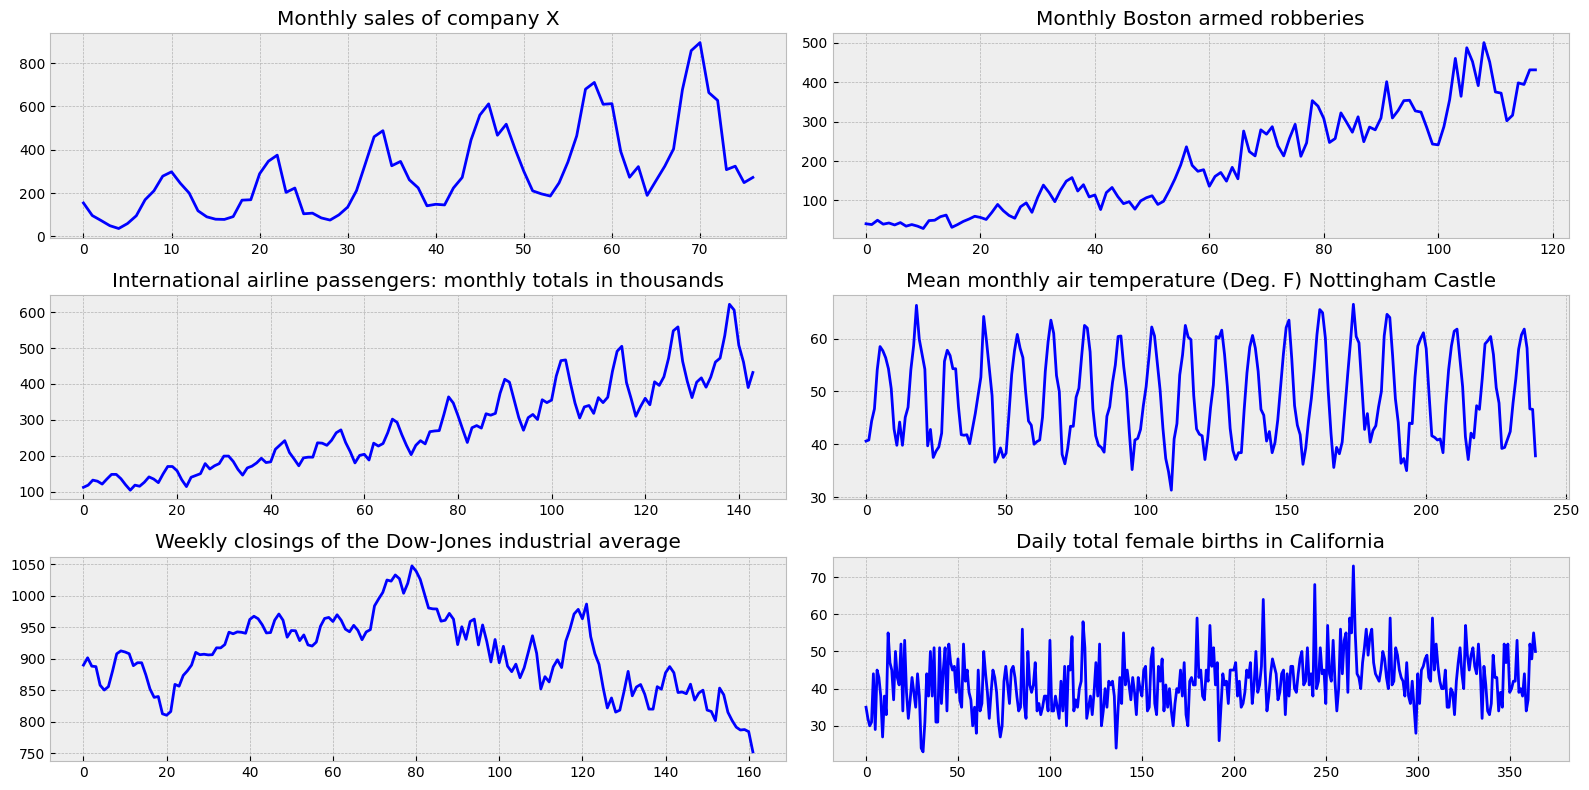

In [ ]:
import matplotlib.pyplot as plt  # Импортируем модуль для визуализации данных

# Устанавливаем стиль графиков на 'bmh'
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))  # Создаем новую фигуру с заданными размерами (16x8 дюймов)
    layout = (3, 2)  # Определяем макет для графиков (3 строки и 2 столбца)

    # Перебираем ключи (названия временных рядов) из словаря all_series
    for i, key in enumerate(all_series.keys()):
        # Определяем позиции для подграфиков
        x = i % 2  # Колонка (0 или 1)
        y = int((i - x) / 2)  # Ряд (0, 1 или 2)

        # Создаем подграфик в заданных координатах (y, x)
        ts_ax = plt.subplot2grid(layout, (y, x))
        # Строим график временного ряда для текущего ключа
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)  # Задаем заголовок подграфика равным ключу

    plt.tight_layout()  # Убираем лишние пробелы между подграфиками для лучшего отображения

In [ ]:
def analyze_time_series(series, title):
    # Проводим тест Дики-Фуллера для проверки стационарности временного ряда
    adf_test = adfuller(series)  # Запускаем тест
    print(f"{title} ADF Statistic: {adf_test[0]}")  # Выводим ADF статистику
    print(f"{title} p-value: {adf_test[1]}")  # Выводим p-value

    # Оценка результатов теста
    if adf_test[1] < 0.05:  # Если p-value меньше 0.05
        print(f"{title} стационарен (отклоняем нулевую гипотезу)")  # Стационарен
    else:
        print(f"{title} нестационарен (не удается отклонить нулевую гипотезу)")  # Нестационарен

# Применяем функцию для каждого временного ряда в словаре
for key, series in all_series.items():
    analyze_time_series(series, key)  # Анализируем временной ряд
    print()  # Печатаем пустую строку для разделения выводов

Monthly sales of company X ADF Statistic: 0.6547150829524446
Monthly sales of company X p-value: 0.9888894205170052
Monthly sales of company X нестационарен (не удается отклонить нулевую гипотезу)

Monthly Boston armed robberies ADF Statistic: 1.001102140245781
Monthly Boston armed robberies p-value: 0.994277563805723
Monthly Boston armed robberies нестационарен (не удается отклонить нулевую гипотезу)

International airline passengers: monthly totals in thousands ADF Statistic: 0.8153688792060498
International airline passengers: monthly totals in thousands p-value: 0.991880243437641
International airline passengers: monthly totals in thousands нестационарен (не удается отклонить нулевую гипотезу)

Mean monthly air temperature (Deg. F) Nottingham Castle ADF Statistic: -3.2554924030863366
Mean monthly air temperature (Deg. F) Nottingham Castle p-value: 0.016989030222608604
Mean monthly air temperature (Deg. F) Nottingham Castle стационарен (отклоняем нулевую гипотезу)

Weekly closings o

На основании ранее проведенного анализа ADF-теста мы можем выбрать следующие ряды:

**Стационарный ряд:** "Средняя месячная температура" (Mean monthly air temperature)

**Нестационарный ряд:** "Число продаж компании X" (Monthly sales of company X)

# Разделение данных на обучающую и тестовую выборки

In [ ]:
# Размер тестовой выборки
test_size = 12

# Обучающая и тестовая выборка для стационарного ряда (Темperature)
mean_temp_train = mean_monthly_temp["Deg"][:-test_size]
mean_temp_test = mean_monthly_temp["Deg"][-test_size:]

# Обучающая и тестовая выборка для нестационарного ряда (Sales)
sales_train = sales_of_company_x["Count"][:-test_size]
sales_test = sales_of_company_x["Count"][-test_size:]

`test_size = 12`, мы используем 12 последних наблюдений (месяцев) в качестве тестовой выборки.

# Построение модели скользящего среднего (MA)

In [ ]:
import statsmodels.api as sm

# Функция для обучения модели MA и предсказания
def train_and_predict_ma(train, test, order):
    model = sm.tsa.ARIMA(train, order=order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    return predictions

# Модель MA для средней температуры
ma_temperature_predictions = train_and_predict_ma(mean_temp_train, mean_temp_test, order=(0, 0, 12))

# Модель MA для продаж компании X
ma_sales_predictions = train_and_predict_ma(sales_train, sales_test, order=(0, 0, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Визуализация предсказаний

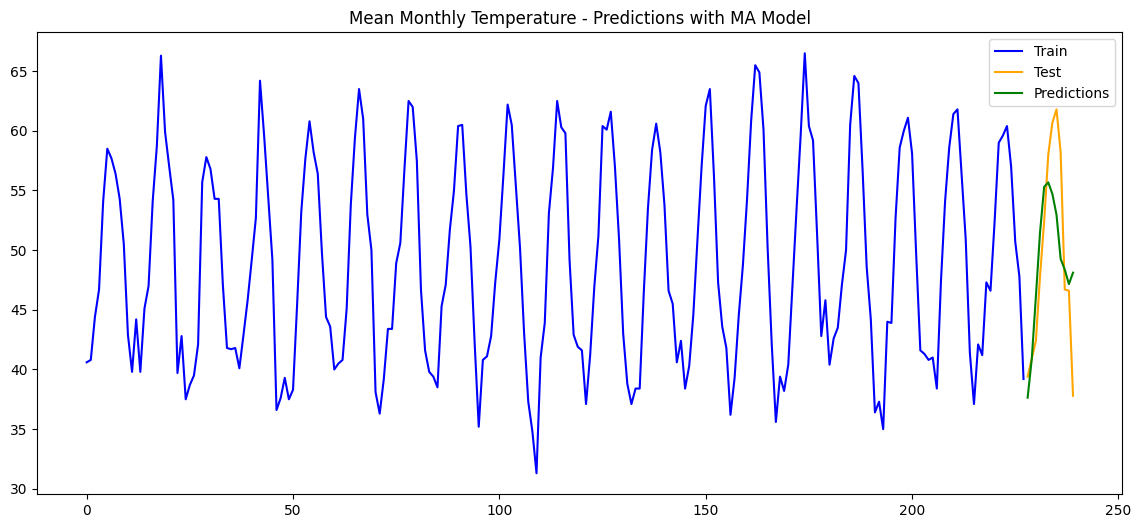

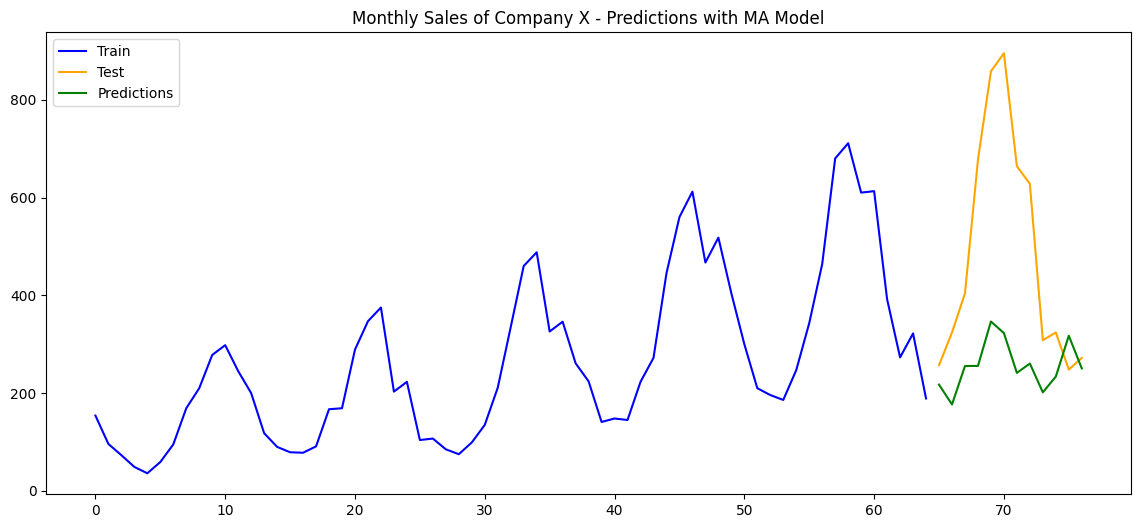

In [ ]:
# Визуализация для средней температуры
plt.figure(figsize=(14, 6))
plt.plot(mean_temp_train.index, mean_temp_train, label='Train', color='blue')
plt.plot(mean_temp_test.index, mean_temp_test, label='Test', color='orange')
plt.plot(mean_temp_test.index, ma_temperature_predictions, label='Predictions', color='green')
plt.title('Mean Monthly Temperature - Predictions with MA Model')
plt.legend()
plt.show()

# Визуализация для продаж компании X
plt.figure(figsize=(14, 6))
plt.plot(sales_train.index, sales_train, label='Train', color='blue')
plt.plot(sales_test.index, sales_test, label='Test', color='orange')
plt.plot(sales_test.index, ma_sales_predictions, label='Predictions', color='green')
plt.title('Monthly Sales of Company X - Predictions with MA Model')
plt.legend()
plt.show()

# Оценка качества предсказания

Для оценки предсказаний можно использовать такие метрики, как среднеквадратичная ошибка (RMSE).

In [ ]:
from sklearn.metrics import mean_squared_error

# Оценка качества модели для средней температуры
rmse_temp = np.sqrt(mean_squared_error(mean_temp_test, ma_temperature_predictions))

# Оценка качества модели для продаж компании X
rmse_sales = np.sqrt(mean_squared_error(sales_test, ma_sales_predictions))

print(f"RMSE for Mean Temperature: {rmse_temp}")
print(f"RMSE for Sales of Company X: {rmse_sales}")

RMSE for Mean Temperature: 5.38079611449785
RMSE for Sales of Company X: 309.6679122979584


### Сравнение
- Точность предсказаний: RMSE для средней температуры значительно ниже RMSE для продаж, что указывает на более высокую точность модели в предсказании температуры.
- Оценка подхода: Возможно, модель для продаж компании X требует пересмотра. Учитывая наличие тренда и сезонности, стоит рассмотреть использование более адаптированных методов моделирования.

Далее будем последовательно рассчитывать следующие модели: взвешенную скользящую среднюю, экспоненциальное сглаживание, двойное экспоненциальное сглаживание и тройное экспоненциальное сглаживание для обеих временных рядов (средняя температура и продажи компании X). После чего мы добавим их метрики (RMSE) в таблицу.

# Взвешенная скользящая средняя (WMA)

In [ ]:
def weighted_moving_average(series, window):
    weights = np.arange(1, window + 1)
    return series.rolling(window).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Прогноз для средней температуры
wma_temp_predictions = weighted_moving_average(mean_temp_train, window=12).iloc[-test_size:]

# Прогноз для продаж компании X
wma_sales_predictions = weighted_moving_average(sales_train, window=12).iloc[-test_size:]

# Оценим RMSE для WMA
rmse_wma_temp = np.sqrt(mean_squared_error(mean_temp_test, wma_temp_predictions))
rmse_wma_sales = np.sqrt(mean_squared_error(sales_test, wma_sales_predictions))

# Экспоненциальное сглаживание (Simple Exponential Smoothing)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def simple_exponential_smoothing(train, test):
    model = SimpleExpSmoothing(train).fit()
    predictions = model.forecast(len(test))
    return predictions

# Прогнозы
ses_temp_predictions = simple_exponential_smoothing(mean_temp_train, mean_temp_test)
ses_sales_predictions = simple_exponential_smoothing(sales_train, sales_test)

# Оценка RMSE
rmse_ses_temp = np.sqrt(mean_squared_error(mean_temp_test, ses_temp_predictions))
rmse_ses_sales = np.sqrt(mean_squared_error(sales_test, ses_sales_predictions))

# Двойное экспоненциальное сглаживание (Holt's Linear Trend Model)

In [ ]:
from statsmodels.tsa.holtwinters import Holt

def double_exponential_smoothing(train, test):
    model = Holt(train).fit()
    predictions = model.forecast(len(test))
    return predictions

# Прогнозы
des_temp_predictions = double_exponential_smoothing(mean_temp_train, mean_temp_test)
des_sales_predictions = double_exponential_smoothing(sales_train, sales_test)

# RMSE
rmse_des_temp = np.sqrt(mean_squared_error(mean_temp_test, des_temp_predictions))
rmse_des_sales = np.sqrt(mean_squared_error(sales_test, des_sales_predictions))

# Тройное экспоненциальное сглаживание (Holt-Winters)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def triple_exponential_smoothing(train, test):
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
    predictions = model.forecast(len(test))
    return predictions

# Прогнозы
tes_temp_predictions = triple_exponential_smoothing(mean_temp_train, mean_temp_test)
tes_sales_predictions = triple_exponential_smoothing(sales_train, sales_test)

# RMSE
rmse_tes_temp = np.sqrt(mean_squared_error(mean_temp_test, tes_temp_predictions))
rmse_tes_sales = np.sqrt(mean_squared_error(sales_test, tes_sales_predictions))

# Сводная таблица результатов

In [ ]:
results_table = pd.DataFrame({
    'Model': [
        'MA',
        'WMA',
        'SES',
        'DES',
        'TES'
    ],
    'Mean Temp RMSE': [
        rmse_temp,
        rmse_wma_temp,
        rmse_ses_temp,
        rmse_des_temp,
        rmse_tes_temp
    ],
    'Sales RMSE': [
        rmse_sales,
        rmse_wma_sales,
        rmse_ses_sales,
        rmse_des_sales,
        rmse_tes_sales
    ]
})

print(results_table)

  Model  Mean Temp RMSE  Sales RMSE
0    MA        5.380796  309.667912
1   WMA        8.023558  252.612064
2   SES       13.107854  377.442595
3   DES       64.179446  814.460321
4   TES        1.854096  183.295817


Сравнение лучших моделей

1. Температура:
   - MA (скользящая средняя): RMSE 5.38
   - TES (тройное экспоненциальное сглаживание): RMSE 1.85

   Анализ:
   - MA дает стабильные результаты для стационарного ряда, так как она учитывает все предыдущие наблюдения с одинаковым весом. Для стационарных данных, которые не имеют резких трендов или сезонности, это более чем достаточно, так как "шум" в данных с минимальным количеством колебаний будет нивелирован.
   - TES демонстрирует наилучшие результаты благодаря способу учета уровня и изменения данных (тренд). Даже если температурный ряд не содержит сезонности, наличие слабых трендов или изменений дает TES возможность адаптироваться к характеру данных. В стационарных рядах TES может также показать высокую эффективность по сравнению с другими методами.

2. Продажи:
   - WMA (взвешенная скользящая средняя): RMSE 252.61
   - TES (тройное экспоненциальное сглаживание): RMSE 183.29

   Анализ:
   - WMA учитывает последние данные более активно, что делает ее эффективной для нестационарных рядов, где изменения происходят постоянно. Это особенно важно для продаж, где оказывается необходимость реагировать на изменения на рынке.
   - TES показывает лучшие результаты, поскольку она учитывает и изменение уровня, и временные тренды, что приводит к лучшему прогнозированию для нестационарных данных.

# Декомпозиция временного ряда - Mean monthly air temperature

In [ ]:
import pandas as pd

# Убедимся, что у нас есть временной индекс
mean_monthly_temp['Month'] = pd.to_datetime(mean_monthly_temp['Month']) # Преобразуем строку дат в datetime
mean_monthly_temp.set_index('Month', inplace=True) # Устанавливаем датовый индекс

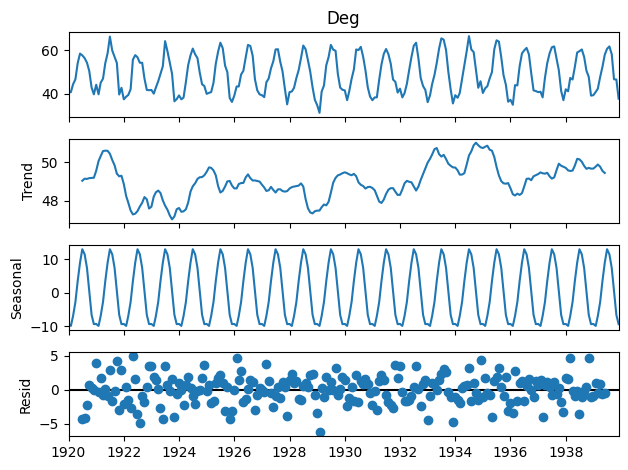

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Выполняем декомпозицию, указываем модель, например, additivе или multiplicative
decomposition = seasonal_decompose(mean_monthly_temp['Deg'], model='additive')

# Плотим результаты декомпозиции
fig = decomposition.plot()
plt.show()

# О связи между плохими показателями моделей (SES и DES) и возможной сезонностью данных Mean monthly air temperature, несмотря на то, что данные о средней месячной температуре считаются стационарными.



### Стационарность и сезонность

#### Стационарность

Стационарность временного ряда предполагает, что его статистические свойства, такие как среднее значение и дисперсия, не изменяются с течением времени. В вашем случае тест Аугментации Дики-Фуллера (ADF) указывает на то, что ряд стационарен (значение p < 0.05, поэтому нулевая гипотеза о наличии единичного корня отклоняется).

#### Сезонность

Сезонность относится к регулярным и предсказуемым изменениям в данных в течение определённых периодов (например, в зависимости от времени года). Важно отметить, что стационарный ряд может иметь сезонность, если статистические свойства (например, среднее и дисперсия) остаются постоянными в течение каждого сезона, но изменяются между сезонами. Такой ряд называется сезонно-стабильным.

### Как это связано с RMSE

#### Плохие показатели RMSE

Сравнение RMSE моделей SES и DES показывает, что эти методы прогнозирования не дают хороших результатов. Высокие значения RMSE могут быть связаны с несколькими факторами:

1. Неучтённая сезонность:
   - Хотя ряд стационарен в целом, если он имеет сезонные колебания (например, температуры летом и зимой различаются), простые модели, такие как SES и DES, могут не справляться с этими колебаниями. Они могут недостаточно предсказывать значения в разные сезоны из-за отсутствия специализированной обработки сезонных колебаний.

2. Недостаточная сложность модели:
   - SES и DES хорошо работают при отсутствии сезонных колебаний или линейных трендов, однако, если в данных присутствует сезонность, эти модели могут не адекватно описывать динамику, что ведет к большим ошибкам прогнозирования.

### Почему именно SES и DES?

- SES (Simple Exponential Smoothing): Эта модель не учитывает тренды и сезонность. Она вычисляет прогнозы, используя только текущее значение и среднее за предыдущие данные. Если данные имеют сезонность, модель будет давать недостоверные результаты, так как не учитывает изменение температуры в зависимости от времени года.
  
- DES (Double Exponential Smoothing): Хотя эта модель учитывает тренды, она также не учитывает сезонные компоненты. В случае наличия сезонности, результаты также будут сниженными.